# Exploratory Data Analysis with the National Immunization Survey

In [1]:
# Setup code
%load_ext ipython_nose

## 1. The National Immunization Survey

Vaccinations are important for the health of both individuals and society as a whole. A number of factors play into when children are immunized against a variety of diseases: doctor recommendations, limitations set by insurance companies, and in some cases, parental preferences and scheduling logistics.

How do these factors play into when children are vaccinated? And how does the scheduling of a vaccine recommended to take place at a certain age (like the Measles, Mumps, Rubella (MMR) vaccine) compare to when children receive vaccines for seasonal diseases like the flu?

Let's find out!

<hr/>

The National Immunuzation Survey is conducted anually by the US Center for Disease Control, and both the raw data and reports are published [on their website](https://www.cdc.gov/vaccines/imz-managers/nis/datasets.html). Here is a taste of what the dataset looks like. (This is a subset of the entire dataset, in order to conserve space.)

Import the 2016 National Immunization Survey from `nis_immunization_2016.csv` and view the first few records.

- Import `pandas` as `pd` and `matplotlib.pyplot` as `plt`.
- Use the pandas function `read_csv()` to read `nis_immunization_2016.csv` from the folder `datasets` into a pandas dataframe called `vac`.
- Use `print()` and `head()` to show the first few rows of the dataframe.

<hr>

## Good to know

You can find (and print out -- maybe even laminate!) a helpful [pandas cheatsheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf) to remind yourself of some of the basic commands and workflows we'll be exploring here.

Also, this project builds on skills and terms introduced in [Intro to Python for Data Science](https://www.datacamp.com/courses/intro-to-python-for-data-science) and [Intermediate Python for Data Science](https://www.datacamp.com/courses/intermediate-python-for-data-science). Feel free to review the slides and exercises as you go through this project.

The `import ____ as ____` snytax will allow you to import functions and libraries with custom (usually shorter) names like `pd` and `plt`.

When calling a `pandas` function, be sure to include both the library and function in your code, and the filename in quotes (single or double will do):

```
vac = pd.read_csv('datasets/filename.csv')
```

Remember the syntax difference between functions (like `print()`) and methods (like `head()`). To print the head of a dataframe `df`, use:

```
print(df.head())
```

In [3]:
# importing pandas as pd and matplotlib.pyplot as plt
...

# reading nis_immunization_2016.csv from the folder datasets
vac = ...

# printing the first 5 records of `vac`
...

SyntaxError: invalid syntax (<ipython-input-3-e38911c59411>, line 2)

In [3]:
# importing pandas as pd and matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt

# reading nis_immunization_2016.csv from the folder datasets
vac = pd.read_csv('datasets/nis_immunization_2016.csv')

# printing the first 5 records of `vac`
print(vac.head())

   YEAR          AGEGRP HAD_CPOX  \
0  2016  24 - 29 MONTHS       NO   
1  2016  24 - 29 MONTHS       NO   
2  2016  24 - 29 MONTHS       NO   
3  2016  24 - 29 MONTHS       NO   
4  2016  30 - 35 MONTHS       NO   

                                                 C5R  CEN_REG       CHILDNM  \
0  MOTHER (STEP, FOSTER, ADOPTIVE) OR FEMALE GUAR...     WEST  TWO OR THREE   
1                                        GRANDPARENT    SOUTH  TWO OR THREE   
2  MOTHER (STEP, FOSTER, ADOPTIVE) OR FEMALE GUAR...  MIDWEST  FOUR OR MORE   
3  MOTHER (STEP, FOSTER, ADOPTIVE) OR FEMALE GUAR...    SOUTH  TWO OR THREE   
4   FATHER (STEP, FOSTER, ADOPTIVE) OR MALE GUARDIAN     WEST  TWO OR THREE   

                          EDUC1 FRSTBRN LANGUAGE                 INCPOV1  \
0                  COLLEGE GRAD      NO  ENGLISH                 UNKNOWN   
1                  COLLEGE GRAD      NO  ENGLISH   ABOVE POVERTY, > $75K   
2  > 12 YEARS, NON-COLLEGE GRAD      NO  ENGLISH                 UNKNOWN   
3   

In [4]:
%%nose

# one or more tests of the students code. 
# The @solution should pass the tests.
# The purpose of the tests is to try to catch common errors and to 
# give the student a hint on how to resolve these errors.

import pandas as pd

def test_example():
    correct_vac = pd.read_csv('datasets/nis_immunization_2016.csv')
    assert 'vac' in globals(), 'There is no dataframe `vac`. Make sure you\'ve correctly imported the data.'
    """
    try:
        pd.testing.assert_frame_equal(vac, correct_vac)
    except AssertionError:
        assert False, '`vac` does not contain the data from `datasets/nis_immunization_2016.csv`. Check the hint if you have trouble loading the data.'
    """
    

1/1 tests passed


## 2. The data dictionary

455 columns!!! Wow! Good thing the dataset comes with a dictionary. 

Let's load the data dictionary and take a look. This tells us what each column label means, the kind of data stored there, and the number of missing values.

Load and display the first few rows of `datasets/nis_immunization_dictionary.csv`.

- Use `read_csv()` to load `datasets/nis_immunization_dictionary.csv` into a `pandas` dataframe called `vac_dic`.
- Print the first 5 rows of `vac_dic`.

<hr>

Use the same procedure as in Task 1. Note that since you already loaded `pandas` as `pd`, you don't need to reload it. Just call its functions with `pd.function_name()`.

After importing `pandas` as `pd`, don't forget to call `pd.read_csv()` instead of just `read_csv()` to use the `pandas` function.

In [2]:
# loading in the data dictionary from nis_immunization_dictionary.csv
vac_dic = ...

# printing the first 5 records of vac_dic
print(...)

                                              Labels  Levels    Class  \
0                                                NaN       1      NaN   
1                                                NaN       1      NaN   
2                                                NaN       2      NaN   
3  FINAL DUAL-FRAME PROVIDER-PHASE WEIGHT (EXCLUD...       0  numeric   
4  FINAL DUAL-FRAME PROVIDER-PHASE WEIGHT INCLUDI...       0  numeric   

   Storage    NAs  
0  integer  28296  
1  integer  28296  
2  integer      0  
3   double  13308  
4   double  13012  


In [7]:
# loading in the data dictionary from nis_immunization_dictionary.csv
vac_dic = pd.read_csv('datasets/nis_immunization_dictionary.csv')

# printing the first 5 records of vac_dic
print(vac_dic.head())

                                              Labels  Levels    Class  \
0                                                NaN       1      NaN   
1                                                NaN       1      NaN   
2                                                NaN       2      NaN   
3  FINAL DUAL-FRAME PROVIDER-PHASE WEIGHT (EXCLUD...       0  numeric   
4  FINAL DUAL-FRAME PROVIDER-PHASE WEIGHT INCLUDI...       0  numeric   

   Storage    NAs  
0  integer  28296  
1  integer  28296  
2  integer      0  
3   double  13308  
4   double  13012  


In [4]:
"""%%nose

# one or more tests of the students code. 
# The @solution should pass the tests.
# The purpose of the tests is to try to catch common errors and to 
# give the student a hint on how to resolve these errors.

def test_example():
    correct_vac_dic = pd.read_csv('datasets/nis_immunization_dictionary.csv')
    assert 'vac_dic' in globals(), 'There is no dataframe `vac_dic`. Make sure you\'ve correctly imported the data.'
    
    try:
        pd.testing.assert_frame_equal(vac_dic, correct_vac_dic)
    except AssertionError:
        assert False, '`vac_dic` does not contain the data from `datasets/nis_immunization_dictionary.csv`. Check the hint if you have trouble loading the data.'
    """

0/1 tests passed; 1 failed
__main__.test_example
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\unittest\case.py", line 59, in testPartExecutor
    yield
  File "C:\ProgramData\Anaconda3\lib\unittest\case.py", line 605, in run
    testMethod()
  File "C:\ProgramData\Anaconda3\lib\site-packages\nose\case.py", line 197, in runTest
    self.test(*self.arg)
  File "<string>", line 8, in test_example
NameError: name 'pd' is not defined



## 3. First MMR Vaccines

There's obviously a lot here worthy of analysis, but let's focus in on two things: a child's first flu vaccine and a child's first MMR vaccine. Let's look at MMR vaccines. 

Find the minimum, maximum, and median ages at which children received their first MMR vaccine.

- Import the `median` function from the `statistics` package.
- Use `list()` to make a new list `mmr` that includes all non-null values from the `DMMR1` column in the dataframe `vac`.
- Apply `min`, `max`, and `median` to `mmr` in order to complete the appropriate `print()` commands.

<hr>

Keep in mind that you can subset a dataframe according to a list of booleans. `vac_not_null` returns a list of True/False values, denoting rows that have non-null (numeric) or null (NA) values for `DMMR1`. Subset `vac` and then call the `DMMR1` column to get all non-null values in that column.

Also remember that `min`, `max`, and `median` return numeric values, not strings. In order to concatenate with strings in your `print()` commands, you will need to use `str()` to convert them to strings.

Subset `vac` by calling

```
vac[vac_not_null]['DMMR1`]
```

to return all non-null values in the `DMMR1` column of `vac`. You can also put this all together in one line with

```
vac[vac['DMMR1'].notnull()]['DMMR1`]
```

In [18]:
# importing median from statistics
...

# makeing a list from the `DMMR1` column of vac and remove null values
vac_not_null = vac['DMMR1'].notnull()
mmr = ...

# earliest vaccine reported
print('The youngest child to receive their first MMR vaccine was ' + .... + ' days old.')
print('The oldest child to receive their first MMR vaccine ' + .... + ' days old.')
print('The typical age at which a child received their first MMR vaccine was ' + .... + ' days old.')

In [11]:
# importing median from statistics
from statistics import median

# makeing a list from the `DMMR1` column of vac and remove null values
vac_not_null = vac['DMMR1'].notnull()
mmr = list(vac[vac_not_null]['DMMR1'])

# earliest vaccine reported
print('The youngest child to receive their first MMR vaccine was ' + str(min(mmr)) + ' days old.')
print('The oldest child to receive their first MMR vaccine ' + str(max(mmr)) + ' days old.')
print('The typical age at which a child received their first MMR vaccine was ' + str(median(mmr)) + ' days old.')

The youngest child to receive their first MMR vaccine was 62.0 days old.
The oldest child to receive their first MMR vaccine 1155.0 days old.
The typical age at which a child received their first MMR vaccine was 378.0 days old.


In [13]:
"""%%nose

# one or more tests of the students code. 
# The @solution should pass the tests.
# The purpose of the tests is to try to catch common errors and to 
# give the student a hint on how to resolve these errors.

def test_example():
    correct_mmr = list(vac[vac['DMMR1'].notnull()]['DMMR1'])
    
    assert mmr == correct_mmr, '`mmr` does not contain the correct data. Don\'t forget to remove null values.'
"""

1/1 tests passed


## 4. Visualizing first MMR vaccines

It seems children tend to receive MMR vaccines around, or just after, their first birthday (365 or 266 days old). These summary statistics are helpful, but there's a wide range between the youngest and oldest recipients of that first MMR vaccine. Let's visualize these vaccination ages to see how those first vaccinations are distributed.

Display a histogram that shows the distribution of ages at which children receive their first MMR vaccination.

- Pass `mmr` to `plt.hist()` to generate a histogram with all default options.
- Use `plt.xlabel()`, `plt.ylabel()`, and `plt.title()` to provide appropriate labels to the visualization.
- Call `plt.show()` last to display the visualization.

Try to make your visualization look something like this:

[![](img/histogram_screenshot.png)](img/histogram_screenshot.png)

`matplotlib.pyplot` was already imported as `plt` in an earlier task. If you left that out, you'll need to import `pyplot` here in order to generate the visualization.

Any appropriate string will work for the labels and title. For example:

```
plt.xlabel('Age of child (in days) upon receiving first MMR vaccine')
```

In [21]:
# Displaying vaccination age distribution, using all default options
...

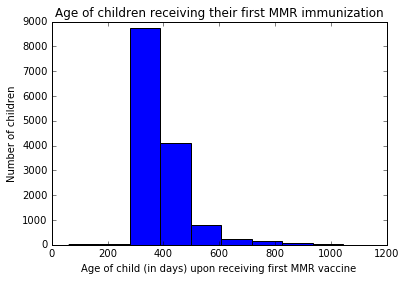

In [9]:
# Displaying vaccination age distribution, using all default options
plt.hist(mmr)
plt.xlabel('Age of child (in days) upon receiving first MMR vaccine')
plt.ylabel('Number of children')
plt.title('Age of children receiving their first MMR immunization')
plt.show()

In [15]:
"""%%nose

# one or more tests of the students code. 
# The @solution should pass the tests.
# The purpose of the tests is to try to catch common errors and to 
# give the student a hint on how to resolve these errors.

def test_example():
    assert 'mmr' in globals(), \
    'Check to see that `mmr` contains the data you need.'"""

1/1 tests passed


## 5. Looking closely

It seems from that histogram that most of the MMR vaccines were around the first or second birthday, and then there is a long tail effect after that. Let's zoom in on the time between first and second birthdays.

Now we see multiple spikes in the histogram, previously smoothed over. These roughly correspond to first birthday and 15 months, with a small bump at 18 months. These are dates that doctors recommend children have checkups.

Notice also that there is a sharp spike up, and then trail off -- a kind of half vell curve. It seems that parents tend to schedule these checkups on or _after_ the corresponding age (12, 15, or 18 months), rather than before. While we might think this is due to the understandable procrastination of young parents, many vaccines prescribe minimum ages (e.g., 12 months _or older_). As a result, doctors sometimes recommend (and insurance companies sometimes require) checkups with vaccinations coming on or after the child's birthday. And, of course, since these vaccinations are important to the child's health, the earlier the better. Hence the half bell curve.

Fine tune the histogram from Task 4 to include 100 bins (each bin representing a 5-day period) and to limit the plot to vaccinations between 300 and 800 days old.

- Copy the code over from Task 4.
- In `plt.hist()`, add `range =` followed by a tuple containing the new minimum and maximum ages (`300` and `800`).
- In `plt.hist()`, add `bins =` followed by the new number of bins (`100`).

<hr>

Take the opportunity to try other values for `range` and `bins`. Can you find new interesting patterns in the data by adjusting these values? What values do you think are optimal for communicating those patterns visually?

`range` takes a _tuple_, while `bins` takes an _integer_. For example:

```
plt.hist(mmr, range = (100,200), bins = 50)
```

Don't forget to include your plot title and axis labels!

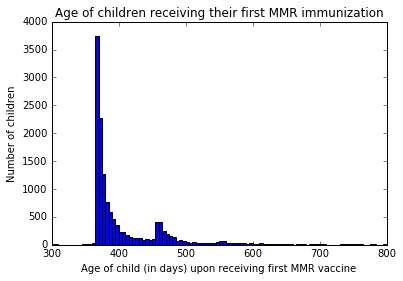

In [10]:
# focusing the histogram to 300-800 days old, and using 100 bins (each bin represents 5 days)
plt.hist(..., range = ..., bins = ...)
...

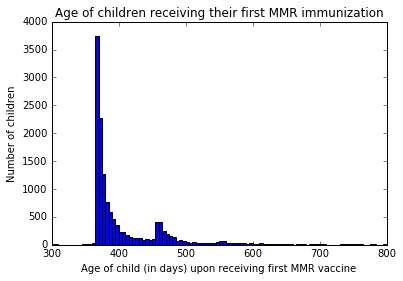

In [11]:
# focusing the histogram to 300-800 days old, and using 100 bins (each bin represents 5 days)
plt.hist(mmr, range = (300,800), bins=100)
plt.xlabel('Age of child (in days) upon receiving first MMR vaccine')
plt.ylabel('Number of children')
plt.title('Age of children receiving their first MMR immunization')
plt.show()

In [16]:
"""%%nose

# one or more tests of the students code. 
# The @solution should pass the tests.
# The purpose of the tests is to try to catch common errors and to 
# give the student a hint on how to resolve these errors.

def test_example():
    assert 'mmr' in globals(), \
    'Check to see that `mmr` contains the data you need.'"""

1/1 tests passed


## 6. First flu vaccine

Let's compare to flu vaccines. Since flu season is tied to a time of year, rather than a person's age, we might expect a different kind of distribution. On the other hand, since infants tend to get their flu vaccines from their pediatrician, we might expect an effect from checkup schedules like we saw with MMR vaccines.

But let's start with the summary statistics.

Find the minimum, maximum, and median ages at which children received their first flu vaccine.

- Create a boolean list `flu_not_null` denoting which rows of `vac` contain non-null values for `DFLU1`. (Follow the pattern in Task 3.)
- Create a new list `flu` that contains all non-null values in the `DFLU1` column of `vac`.
- Apply `min`, `max`, and `median` to `mmr` in order to complete the appropriate `print()` commands.

Use the code from Task 3 as your guide, and simply change the column name.

In [27]:
# making a list from the `DFLU1` column of vac and remove null values
flu_not_null = vac[...].notnull()
flu = ...

# earliest vaccine reported
print('The youngest child to receive their first flu vaccine was ' + ... + ' days old.')
print('The oldest child to receive their first flu vaccine ' + ... + ' days old.')
print('The typical age at which a child received their first flu vaccine was ' + ... + ' days old.')

In [18]:
# making a list from the `DFLU1` column of vac and remove null values
flu_not_null = vac['DFLU1'].notnull()
flu = list(vac[flu_not_null]['DFLU1'])

# earliest vaccine reported
print('The youngest child to receive their first flu vaccine was ' + str(min(flu)) + ' days old.')
print('The oldest child to receive their first flu vaccine ' + str(max(flu)) + ' days old.')
print('The typical age at which a child received their first flu vaccine was ' + str(median(flu)) + ' days old.')

The youngest child to receive their first flu vaccine was 0.0 days old.
The oldest child to receive their first flu vaccine 1257.0 days old.
The typical age at which a child received their first flu vaccine was 279.0 days old.


In [19]:
"""%%nose

# one or more tests of the students code. 
# The @solution should pass the tests.
# The purpose of the tests is to try to catch common errors and to 
# give the student a hint on how to resolve these errors.

def test_example():
    correct_flu = list(vac[vac['DFLU1'].notnull()]['DFLU1'])
    
    assert flu == correct_flu, '`flu` does not contain the correct data. Don\'t forget to remove null values.'
"""

1/1 tests passed


## 7. Visualizing children's first flu vaccines

That definitely looks different than the MMR, as the median age for the first flu vaccine comes before the first birthday. Of course, this is the time of life in which infants have very frequent visits to the pediatrician, so we can't rule out a checkup-scheduling effect. Let's visualize the data and see what we find.

Fine tune the histogram from Task 5 to plot first flu shots between 0 and 800 days old, with each bin representing a 5-day period.

- Copy the code over from Task 5.
- Change the value of `range` to return the range 0-800 days.
- Change the value of `bins` to maintain 5-day bins for the new range.

Remember that `range` takes a tuple and `bins` takes an integer.

To return 5-day bins for the range 0-800, set `bins` to `160`.

In [30]:
# Display flu vaccination age distribution as histogram, 0-800 days old, with 160 bins
...

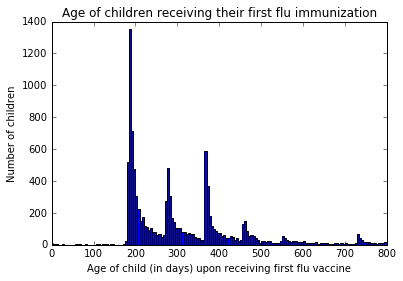

In [13]:
# Display flu vaccination age distribution as histogram, 0-800 days old, with 160 bins
plt.hist(flu, range = (0,800), bins=160)
plt.xlabel('Age of child (in days) upon receiving first flu vaccine')
plt.ylabel('Number of children')
plt.title('Age of children receiving their first flu immunization')
plt.show()

In [20]:
"""%%nose

# one or more tests of the students code. 
# The @solution should pass the tests.
# The purpose of the tests is to try to catch common errors and to 
# give the student a hint on how to resolve these errors.

def test_example():
    assert 'flu' in globals(), \
    'Check to see that `flu` contains the data you need.'"""

1/1 tests passed


## 8. Visualizing the first _three_ flu vaccines

Judging by the shape of the previous histogram, it looks like the first flu shot tends to be administered at a regular checkup, mainly 6, 9, or 12 months. Hardly any were administered before 6 months, which is [the CDC's recommended minimum age](https://www.cdc.gov/flu/protect/children.htm) for a flu vaccine.

The flu shot is administered far more frequently than the MMR, though. In fact, most infants are recommended to receive _two_ doses of the flu shot during their first flu season. The National Immunization Survey includes dates for (up to) the first nine flu immunizations, so let's look a little closer at some of these other vaccinations. This next histogram shows the ages at which children received any of their first three (reported) flu shots.

This is fascinating! The half bell curve is still pronounced for many of the regular checkups (6, 9, 12, 15, and 18 months), but there is also a more rounded peak about a month after each one of those checkup dates, especially between 6 and 18 months old. The CDC recommends that for children receiving two flu shots in a single season (typical for the first season receiving a flu shot), there should be at least 28 days between doses, explaning the second peak. Since 6 months is the minimum age for the flu vaccine, and a child's first flu season in which they are eligible for the vaccine will come between 6 and 18 months old, this is the time period during which the double-peak is most pronounced.

But why is the second peak more rounded than the first? The first peak is a half bell curve likely because of minimum recommended (or required) ages for vaccines administered at those checkups. But the second peak of each pair is only for a flu shot. There is no birthday/milestone associated with the date, and parents might feel less urgency about having the _second_ dose at the first safe date than they do about vaccines their child is receiving for the first time. Regardless, we can see that the first flu shot dates exhibit both a seasonal effect _and_ some of the same checkup-oriented scheduling effects as the MMR, like the half bell curve. However, the _second_ flu shot tends to follow a more normal distribution of ages, despite tending to follow a regular checkup by about a month.

Display a histogram showing the ages of children's first three flu vaccines.

- Create a new list `flu_shots` that contains all the non-null values of the columns `DFLU1`, `DFLU2`, and `DFLU3` in `vac`.
- Create a histogram showing the distribution of those vaccinations in `flu_shots`. All options should be the same as in Task 7, but be sure to update the axis labels and plot title appropriately.

You have seen the code needed to make a list of all non-null values in a column in previous tasks. The one-line version will be the simplest for this task:

```
list(vac[vac['column_name'].notnull()]['column_name'])
```

To create a list from _three_ columns, concatenate lists with `+`:

```
long_list = list1 + list2 + list3
```

In [33]:
# creating a list containing all non-null ages in `DFLU1`, `DFLU2`, and `DFLU3`
flu_shots = ...

# Displaying flu vaccination age distribution as histogram, 0-800 days old, with 160 bins
...

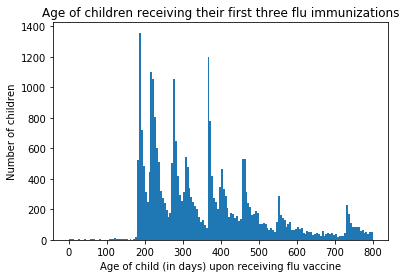

In [22]:
# creating a list containing all non-null ages in `DFLU1`, `DFLU2`, and `DFLU3`
flu_shots = list(vac[vac['DFLU1'].notnull()]['DFLU1']) + list(vac[vac['DFLU2'].notnull()]['DFLU2']) + list(vac[vac['DFLU2'].notnull()]['DFLU2'])

# Displaying flu vaccination age distribution as histogram, 0-800 days old, with 160 bins
plt.hist(flu_shots, range = (0,800), bins=160)
plt.xlabel('Age of child (in days) upon receiving flu vaccine')
plt.ylabel('Number of children')
plt.title('Age of children receiving their first three flu immunizations')
plt.show()

In [23]:
"""%%nose

# one or more tests of the students code. 
# The @solution should pass the tests.
# The purpose of the tests is to try to catch common errors and to 
# give the student a hint on how to resolve these errors.

def test_example():
    assert flu_shots == list(vac[vac['DFLU1'].notnull()]['DFLU1']) + list(vac[vac['DFLU2'].notnull()]['DFLU2']) + list(vac[vac['DFLU2'].notnull()]['DFLU2']), \
    '`flu_shots` does not contain the correct data. Be sure to remove null values and concatenate multiple lists with `+`.'"""

1/1 tests passed


## 9. Bringing it all together

Since both of these vaccines are tied to regular doctor visits in some way, let's plot the first MMR and the first flu shot together and see what kind of large-scale relationship we can find.

Display a scatter plot comparing the first MMR vaccination date (X axis) to the first flu vaccination date (Y axis).

- Create a new dataframe `flu_vs_mmr` by subsetting `vac` to only include the columns `DFLU1` and `DMMR1`.
- Use `plt.scatter()` to create a scatter plot with `DMMR1` as the X axis and `DFLU1` as the Y axis.
- Use `plt.xlabel()`, `plt.ylabel()`, and `plt.title()` to provide appropriate labels to the plot.
- Show your plot.

<hr/>

We used the `notnull()` method above to remove null values from lists, but here we use the `dropna()` method. This method, when no options are passed to it, returns only the rows that contain no null values _in any column_. It's a helpful method to know about when performing statistical analysis on messy or incomplete datasets.

Since you are subsetting `vac` according to a list of columns, you need double square brackets -- one for the subset, one for the list:

```
flu_vs_mmr = vac[['column_name_1', 'column_name_2']]
```

Be sure to call the columns of the cleaned dataframe `flu_vs_mmr` in `plt.scatter()`, not the raw columns from `vac`.

In [ ]:
# subsetting vac to only the `DFLU1` and `DMMR1` columns
flu_vs_mmr = ...

# Removing any rows containing one or more null values from flu_vs_mmr
flu_vs_mmr = flu_vs_mmr.dropna()

# Plotting the age of the first MMR vaccine (X) against the first flu vaccine (Y)
plt.scatter(..., ...)
...

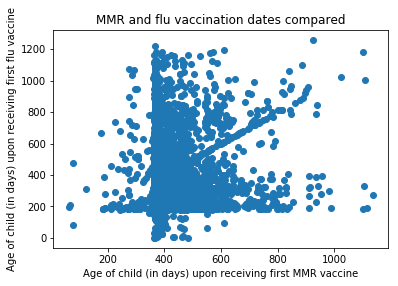

In [27]:
# subsetting vac to only the `DFLU1` and `DMMR1` columns
flu_vs_mmr = vac[['DFLU1', 'DMMR1']]

# Removing any rows containing one or more null values from flu_vs_mmr
flu_vs_mmr = flu_vs_mmr.dropna()

# Plotting the age of the first MMR vaccine (X) against the first flu vaccine (Y)
plt.scatter(flu_vs_mmr['DMMR1'], flu_vs_mmr['DFLU1'])
plt.xlabel('Age of child (in days) upon receiving first MMR vaccine')
plt.ylabel('Age of child (in days) upon receiving first flu vaccine')
plt.title('MMR and flu vaccination dates compared')
plt.show()

In [5]:
"""%%nose

# one or more tests of the students code. 
# The @solution should pass the tests.
# The purpose of the tests is to try to catch common errors and to 
# give the student a hint on how to resolve these errors.

def test_example():
    assert 'flu_vs_mmr' in globals(), 'There is no dataframe `flu_vs_mmr`. Make sure you\'ve correctly imported the data.'

    try:
        pd.testing.assert_frame_equal(flu_vs_mmr, vac[['DFLU1', 'DMMR1']].dropna())
    except AssertionError:
        assert False, '`flu_vs_mmr` does not contain the correct data. Be sure to use double square brackets `[[]]` to subset `vac` with multiple columns.'
    """

0/1 tests passed; 1 failed
__main__.test_example
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\unittest\case.py", line 59, in testPartExecutor
    yield
  File "C:\ProgramData\Anaconda3\lib\unittest\case.py", line 605, in run
    testMethod()
  File "C:\ProgramData\Anaconda3\lib\site-packages\nose\case.py", line 197, in runTest
    self.test(*self.arg)
  File "<string>", line 8, in test_example
AssertionError: There is no dataframe `flu_vs_mmr`. Make sure you've correctly imported the data.



## 10. Conclusion

I don't know about you, but this isn't what I expected to see! I expected to see more of a linear relationship -- perhaps multiple lines with a `y = x` slope, but different intercepts (corresponding to the scheduled checkup closest to the start of the child's first flu season). Instead, we see a lot of blobs with a rough L shape, taller than they are wide. What does this mean?

The vertical line component of each L corresponds to children getting their first MMR at the same age, but their first flu shot on different dates. More pronounced lines correspond to more children getting their MMR at the same age, and expectedly overlap with the spikes we saw in the histogram analysis above. 

The horizontal lines represent children getting their first flu shot at the same age, but not their MMR. Since the MMR is more tied to age and the flu to season, it makes sense that these lines would be shorter than the vertical lines. The fact that they point to the right, rather than straddle the vertical lines, corresponds to the half bell curve seen in the histograms. As noted above, parents bring children in for checkups _on or after_ certain ages, rather than before. And since infants' MMR shots tend to be done at one of these checkups, it makes sense that we would see this trend here as well.

Finally, there _is_ a line in this plot, exactly on the `y = x` slope. What do you think it represents?

Print the appropriate interpretation for the `y = x` line.

- Assign the appropriate index number to the list `interpretation`, corresponding to the best interpretation.

Remember that indexes in Python begin with `0`. Your options here are `0`, `1`, and `2`.

In [ ]:
# interpreting the results
interpretation = ['children who only received one vaccine.', 
                  'children who received both vaccines exactly on their birthday.', 
                  'children who received their first MMR and their first flu shot on the same day.']

correct = interpretation[...]

print('The `y = x` line on the scatter plot corresponds to ' + correct)

In [31]:
# interpreting the results
interpretation = ['children who only received one vaccine.', 
                  'children who received both vaccines exactly on their birthday.', 
                  'children who received their first MMR and their first flu shot on the same day.']

correct = interpretation[2]

print('The `y = x` line on the scatter plot corresponds to ' + correct)

The `y = x` line on the scatter plot corresponds to children who received their first MMR and their first flu shot on the same day.


In [33]:
"""%%nose

def test_nothing():
    assert correct == interpretation[2], \
    'Try again. Don\'t forget that in Python, indexes start counting with 0.' """

1/1 tests passed
